In [1]:
# Import Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Seed
seed = 42
rng = np.random.RandomState(seed)

# Set path variables

csvPath ="./../../CV101/datasets/facial_keypoint_identification/"
imagePath=csvPath+'images/'
dataFile='facial_keypoint_identification.csv'



In [2]:
! pwd
! ls ./../../CV101/datasets/facial_keypoint_identification/

/home/jovyan/work/AI-ML-BlackBelt-AnalyticsVidhya/Computer Vision
facial_keypoint_identification.csv  images


In [3]:
print(csvPath + dataFile)

./../../CV101/datasets/facial_keypoint_identification/facial_keypoint_identification.csv


In [69]:
# Read the data
data = pd.read_csv(csvPath + dataFile)
data.head()


,image_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y
0,0.jpg,66,39,30,36
1,1.jpg,64,34,29,33
2,2.jpg,65,34,30,34
3,3.jpg,65,37,32,37
4,4.jpg,66,39,32,38


The shape of the is (96, 96, 3)


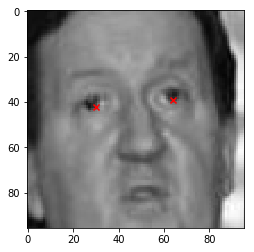

In [182]:

# Read random data and plot it's image
idx = rng.choice(data.index)
img = plt.imread(imagePath + data.image_name.iloc[idx])
fig = plt.figure()
plt.imshow(img)

# Plot Target
plt.scatter(data.left_eye_center_x.iloc[idx],data.left_eye_center_y.iloc[idx],marker='x',c='r')
plt.scatter(data.right_eye_center_x.iloc[idx],data.right_eye_center_y.iloc[idx],marker='x',c='r')


# Print the shape of image
print('The shape of the is',img.shape)
plt.show()



In [6]:
# Compute mean_squared_error of the Eyes 
from sklearn.metrics import mean_squared_error

error_left_x = mean_squared_error(data.left_eye_center_x.values,np.full(data.left_eye_center_x.values.shape,data.left_eye_center_x.mean()))
error_left_y = mean_squared_error(data.left_eye_center_y.values,np.full(data.left_eye_center_y.values.shape,data.left_eye_center_y.mean()))

error_right_x = mean_squared_error(data.right_eye_center_x.values,np.full(data.right_eye_center_x.values.shape,data.right_eye_center_x.mean()))
error_right_y = mean_squared_error(data.right_eye_center_y.values,np.full(data.right_eye_center_y.values.shape,data.right_eye_center_y.mean()))


error = ( error_left_x*error_left_x +  error_left_y*error_left_y +  error_right_x*error_right_x + 
error_right_y*error_right_y  )/4

In [7]:
error

104.5789947402131

In [8]:

(0.2*0.2+ 0.5*0.5+ 0.7*0.7 + 0.1*0.1)/4

0.1975

## Load and Pre process the data 

In [9]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [10]:
data.head()

,image_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y
0,0.jpg,66,39,30,36
1,1.jpg,64,34,29,33
2,2.jpg,65,34,30,34
3,3.jpg,65,37,32,37
4,4.jpg,66,39,32,38


In [11]:
images = []
for img in data.image_name:
    img = image.load_img(imagePath+img,target_size=(224,224,3))
    img = image.img_to_array(img)
    images.append(img)
images= np.array(images)

In [12]:
images.shape

(7033, 224, 224, 3)

In [13]:
X = preprocess_input(images,mode='tf')


In [14]:
y = data.iloc[:,1:].values

In [15]:
X_train,X_valid,y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
!ls -ltra $HOME/.keras/models ; du -hs $HOME/.keras/models/*

total 809156
-rw-r--r-- 1 jovyan users  96112376 Jul 13 17:10 inception_v3_weights_tf_dim_ordering_tf_kernels.h5
-rw-r--r-- 1 jovyan users       120 Jul 13 17:10 keras.json
-rw-r--r-- 1 jovyan users  17225924 Jul 13 17:10 mobilenet_1_0_224_tf.h5
-rw-r--r-- 1 jovyan users 102853048 Jul 13 17:10 resnet50_weights_tf_dim_ordering_tf_kernels.h5
-rw-r--r-- 1 jovyan users 553467096 Jul 13 17:10 vgg16_weights_tf_dim_ordering_tf_kernels.h5
drwxr-sr-x 2 jovyan users      4096 Jul 13 17:10 .
-rw-r--r-- 1 jovyan users  58889256 Jul 13 17:10 vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
drwxr-sr-x 3 jovyan users      4096 Jul 14 05:16 ..
92M	/home/jovyan/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
4.0K	/home/jovyan/.keras/models/keras.json
17M	/home/jovyan/.keras/models/mobilenet_1_0_224_tf.h5
99M	/home/jovyan/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels.h5
528M	/home/jovyan/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5
57M	/home/jovyan/.keras/model

In [19]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X', 4234653840),
 ('images', 4234653840),
 ('X_train', 2964197520),
 ('X_valid', 1270456464),
 ('data', 681195),
 ('y_train', 157648),
 ('y_valid', 67632),
 ('Adam', 1056),
 ('Dense', 1056),
 ('Dropout', 1056),
 ('EarlyStopping', 1056),
 ('InputLayer', 1056),
 ('Sequential', 1056),
 ('VGG16', 136),
 ('mean_squared_error', 136),
 ('preprocess_input', 136),
 ('train_test_split', 136),
 ('img', 128),
 ('y', 112),
 ('imagePath', 110),
 ('csvPath', 103),
 ('dataFile', 83),
 ('image', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('rng', 72),
 ('fig', 56),
 ('error', 32),
 ('error_left_x', 32),
 ('error_left_y', 32),
 ('error_right_x', 32),
 ('error_right_y', 32),
 ('idx', 32),
 ('seed', 28)]

In [24]:
#del(X)
#del(images)
del(data)

In [25]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_train', 2964197520),
 ('X_valid', 1270456464),
 ('y_train', 157648),
 ('y_valid', 67632),
 ('Adam', 1056),
 ('Dense', 1056),
 ('Dropout', 1056),
 ('EarlyStopping', 1056),
 ('InputLayer', 1056),
 ('Sequential', 1056),
 ('VGG16', 136),
 ('mean_squared_error', 136),
 ('preprocess_input', 136),
 ('train_test_split', 136),
 ('img', 128),
 ('y', 112),
 ('imagePath', 110),
 ('csvPath', 103),
 ('dataFile', 83),
 ('image', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('rng', 72),
 ('fig', 56),
 ('error', 32),
 ('error_left_x', 32),
 ('error_left_y', 32),
 ('error_right_x', 32),
 ('error_right_y', 32),
 ('idx', 32),
 ('seed', 28)]

In [17]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,InputLayer
from keras.callbacks import EarlyStopping


In [26]:
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [28]:
sys.getsizeof(base_model)

56

In [29]:
feature_train = base_model.predict(X_train)

In [30]:
feature_valid = base_model.predict(X_valid)

In [39]:
max_value = feature_train.max()
feature_train /= max_value
feature_valid /= max_value

In [42]:
feature_train.shape

(4923, 25088)

In [41]:
feature_train = feature_train.reshape(feature_train.shape[0],7*7*512)
feature_valid = feature_valid.reshape(feature_valid.shape[0],7*7*512)

In [181]:
feature_train.shape

(4923, 25088)

In [57]:
import dill
dill.dump_session('notebook_env.db')

ModuleNotFoundError: No module named 'dill'

In [58]:
# Create A Neral Network

model = Sequential()

model.add(InputLayer((7*7*512,)))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4,activation='linear'))

adam = Adam(lr=1e-3)

model.compile(loss='mean_squared_error',optimizer=adam)

In [59]:
estop = EarlyStopping(patience=10,mode='min',min_delta=0.001,monitor='val_loss')

In [66]:
history  = model.fit(feature_train,y_train,epochs=50,batch_size=512,validation_data=(feature_valid,y_valid),callbacks=[estop])


Train on 4923 samples, validate on 2110 samples
Epoch 1/50
4923/4923 [==============================] - 6s 1ms/step - loss: 7.4890 - val_loss: 5.6228
Epoch 2/50
4923/4923 [==============================] - 6s 1ms/step - loss: 7.4183 - val_loss: 5.6499
Epoch 3/50
4923/4923 [==============================] - 8s 2ms/step - loss: 7.3577 - val_loss: 5.5819
Epoch 4/50
4923/4923 [==============================] - 7s 1ms/step - loss: 7.2499 - val_loss: 5.5380
Epoch 5/50
4923/4923 [==============================] - 7s 1ms/step - loss: 7.2113 - val_loss: 5.5228
Epoch 6/50
4923/4923 [==============================] - 9s 2ms/step - loss: 7.1212 - val_loss: 5.5055
Epoch 7/50
4923/4923 [==============================] - 8s 2ms/step - loss: 7.0708 - val_loss: 5.4701
Epoch 8/50
4923/4923 [==============================] - 7s 1ms/step - loss: 7.1684 - val_loss: 5.4746
Epoch 9/50
4923/4923 [==============================] - 7s 1ms/step - loss: 7.0098 - val_loss: 5.4344
Epoch 10/50
4923/4923 [===========

dict_keys(['val_loss', 'loss'])


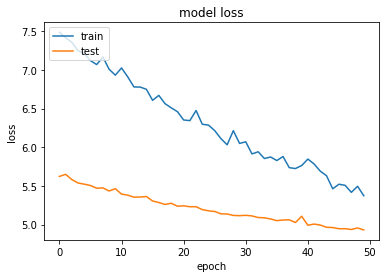

In [70]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
#get Predictions
predictions = model.predict(feature_valid)



In [180]:
predictions.shape

(2110, 4)

In [179]:
predictions

array([[65.18928 , 38.422493, 28.862242, 36.338604],
       [63.741684, 35.969826, 29.419973, 36.990486],
       [67.15737 , 38.02894 , 30.239246, 38.882835],
       ...,
       [66.784256, 38.176212, 29.367008, 37.110806],
       [65.75401 , 34.88587 , 29.825739, 39.641113],
       [63.82498 , 36.569122, 31.007456, 37.182087]], dtype=float32)

In [71]:
# extract validartion 
_,valid_image,_ ,_ = train_test_split(data.image_name,y,test_size=0.3,random_state=42)


6800.jpg


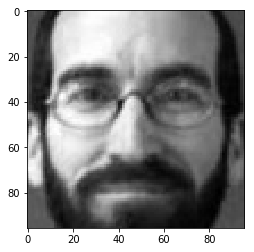

In [160]:
image_name = rng.choice(valid_image)
print(image_name)
img = plt.imread(imagePath + image_name)
# Plot the empty figure
fig = plt.figure()
# Plot the image
plt.imshow(img)

print()

746.jpg
The shape of the is (96, 96, 3)


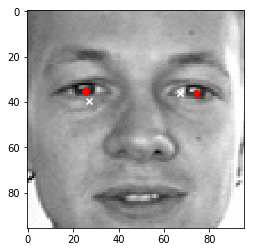

In [177]:
#Plot the Predicted values vs the actual values

# Read random data and plot it's image
image_name = rng.choice(valid_image)
#image_name = valid_image[idx]
print(image_name)

# Get the actual Values
left_x = data.loc[data.image_name==image_name,'left_eye_center_x']
left_y = data.loc[data.image_name==image_name,'left_eye_center_y']
right_x = data.loc[data.image_name==image_name,'right_eye_center_x']
right_y = data.loc[data.image_name==image_name,'right_eye_center_y']

pred_left_x,pred_left_y, pred_right_x,pred_right_y = predictions[idx]


# read the Image
img = plt.imread(imagePath + image_name)
# Plot the empty figure
fig = plt.figure()
# Plot the image
plt.imshow(img)

# Plot Target
plt.scatter(left_x,left_y,marker='o',c='r')
plt.scatter(right_x,right_y,marker='o',c='r')

# Plot the predictions


plt.scatter(pred_left_x,pred_left_y,marker='x',c='w')
plt.scatter(pred_right_x,pred_right_y,marker='x',c='w')


# Print the shape of image
print('The shape of the is',img.shape)
plt.show()



In [ ]:
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)